Data used for cleaning: 

https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Current-Year-To-Date-/5uac-w243/about_data

Overall thoughts:
- Seems to be nearly everywhere...
- Recency is also an issue

# Imports


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx
import seaborn as sns

In [ ]:
# Load the CSV file into a GeoPandas dataframe
gdf = pd.read_csv('/Users/naliniramanathan/projects/se_1/team2-wed-spring25/input_data/NYPD_Complaint_Data_Current__Year_To_Date__20250220.csv')

/var/folders/7b/0zqwym191dq_5jvhhbf5lfgr0000gn/T/ipykernel_67549/3539375895.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  gdf = pd.read_csv('/Users/naliniramanathan/projects/se_1/team2-wed-spring25/input_data/NYPD_Complaint_Data_Current__Year_To_Date__20250220.csv')


In [ ]:
gdf['CMPLNT_NUM'].unique()

array(['296538111H1', '296164481', '292224978', ..., 288153578, 294899794,
       286796420], shape=(577108,), dtype=object)

In [ ]:
len(gdf)

577108

In [ ]:
gdf.head()

CMPLNT_NUM  ADDR_PCT_CD    BORO_NM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT  \
0  296538111H1           42      BRONX   08/14/2024     19:41:00          NaN   
1    296164481           48      BRONX   02/01/2021     16:00:00          NaN   
2    292224978           34  MANHATTAN   08/24/2024     00:38:00          NaN   
3    298613169          116     QUEENS   12/29/2024     16:23:00   12/29/2024   
4    292542564           73   BROOKLYN   08/30/2024     14:55:00   08/30/2024   

  CMPLNT_TO_TM CRM_ATPT_CPTD_CD HADEVELOPT  HOUSING_PSA  JURISDICTION_CODE  \
0       (null)        COMPLETED     (null)          NaN                  0   
1       (null)        COMPLETED     (null)          NaN                  0   
2       (null)        COMPLETED     (null)          NaN                 97   
3     16:34:00        COMPLETED     (null)          NaN                  0   
4     15:00:00        COMPLETED     (null)          NaN                  0   

         JURIS_DESC  KY_CD LAW_CAT_CD LOC_OF_OCCUR_DESC  \
0  N.Y. POLICE DEPT    101     FELONY            INSIDE   
1  N.Y. POLICE DEPT    104     FELONY            INSIDE   
2             OTHER    114     FELONY            INSIDE   
3  N.Y. POLICE DEPT    125     FELONY            (null)   
4  N.Y. POLICE DEPT    104     FELONY            (null)   

                         OFNS_DESC PARKS_NM               PATROL_BORO  PD_CD  \
0  MURDER & NON-NEGL. MANSLAUGHTER   (null)         PATROL BORO BRONX    NaN   
1                             RAPE   (null)         PATROL BORO BRONX  153.0   
2                            ARSON   (null)     PATROL BORO MAN NORTH  263.0   
3                 OTHER STATE LAWS   (null)  PATROL BORO QUEENS SOUTH  847.0   
4                             RAPE   (null)   PATROL BORO BKLYN NORTH  157.0   

                          PD_DESC            PREM_TYP_DESC      RPT_DT  \
0                          (null)  MULTI DWELL - APT BUILD  08/14/2024   
1                          RAPE 3          PARK/PLAYGROUND  11/08/2024   
2                     ARSON 2,3,4   RESIDENCE - APT. HOUSE  08/24/2024   
3  NY STATE LAWS,UNCLASSIFIED FEL                   STREET  12/29/2024   
4                          RAPE 1                   STREET  08/30/2024   

  STATION_NAME SUSP_AGE_GROUP       SUSP_RACE SUSP_SEX  TRANSIT_DISTRICT  \
0       (null)         (null)          (null)   (null)               NaN   
1       (null)            <18  BLACK HISPANIC        M               NaN   
2       (null)        UNKNOWN         UNKNOWN        U               NaN   
3       (null)         (null)          (null)   (null)               NaN   
4       (null)            <18           BLACK        M               NaN   

  VIC_AGE_GROUP        VIC_RACE VIC_SEX  X_COORD_CD  Y_COORD_CD   Latitude  \
0           <18  WHITE HISPANIC       F         NaN         NaN        NaN   
1           <18           BLACK       F   1011751.0    246839.0  40.844157   
2         25-44         UNKNOWN       F   1003658.0    250199.0  40.853392   
3       UNKNOWN         UNKNOWN       E   1057893.0    182156.0        NaN   
4         18-24           BLACK       F   1008245.0    183796.0  40.671130   

   Longitude                                Lat_Lon  \
0        NaN                                    NaN   
1 -73.900605  (40.8441566000203, -73.9006054489734)   
2 -73.929842                (40.853392, -73.929842)   
3        NaN                                    NaN   
4 -73.913502  (40.6711300016904, -73.9135020552048)   

                     New Georeferenced Column  
0                                         NaN  
1  POINT (-73.9006054489734 40.8441566000203)  
2                POINT (-73.929842 40.853392)  
3                                         NaN  
4  POINT (-73.9135020552048 40.6711300016904)

/var/folders/7b/0zqwym191dq_5jvhhbf5lfgr0000gn/T/ipykernel_67549/501180219.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  gdf = pd.read_csv('/Users/naliniramanathan/projects/se_1/team2-wed-spring25/input_data/NYPD_Complaint_Data_Current__Year_To_Date__20250220.csv')


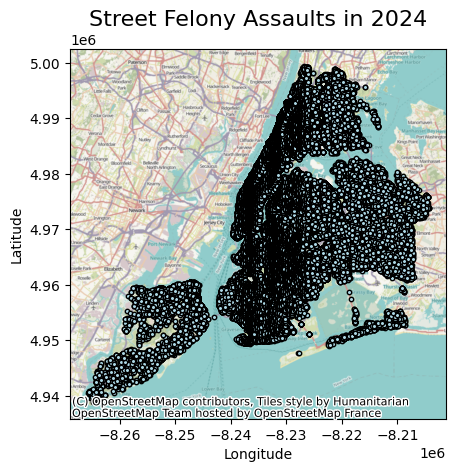

In [16]:
gdf = pd.read_csv('/Users/naliniramanathan/projects/se_1/team2-wed-spring25/input_data/NYPD_Complaint_Data_Current__Year_To_Date__20250220.csv')

gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf['Longitude'], gdf['Latitude']))

# First, set the CRS to WGS84 (EPSG:4326), as it's standard for lat/lon
gdf.set_crs(epsg=4326, allow_override=True, inplace=True)

# Clean the data: Filter out rows with NaN latitudes or longitudes
gdf = gdf[gdf['Latitude'].notna() & gdf['Longitude'].notna()]

# Remove the rows with invalid latitudes and longitudes
gdf = gdf[(gdf['Latitude'] <= 50) & (gdf['Latitude'] >= 40)]
gdf = gdf[(gdf['Longitude'] <= -60) & (gdf['Longitude'] >= -80)]


# Extract some additional time data
gdf['CMPLNT_FR_DT'] = pd.to_datetime(gdf['CMPLNT_FR_DT'], format='%m/%d/%Y', errors='coerce')
gdf['Month'] = gdf['CMPLNT_FR_DT'].dt.month
gdf['DayOfWeek'] = gdf['CMPLNT_FR_DT'].dt.dayofweek  # 0 = Monday, 6 = Sunday
gdf['Year'] = gdf['CMPLNT_FR_DT'].dt.year

gdf['CMPLNT_TO_TM'] = pd.to_datetime(gdf['CMPLNT_TO_TM'], format='%H:%M:%S', errors='coerce')
gdf['Hour'] = gdf['CMPLNT_TO_TM'].apply(lambda x: x.hour if pd.notna(x) else None)


# Convert latitude and longitude to numeric values (if they are not already)
gdf['Latitude'] = pd.to_numeric(gdf['Latitude'], errors='coerce')
gdf['Longitude'] = pd.to_numeric(gdf['Longitude'], errors='coerce')

# Ensure the geometry column is in the correct CRS (WGS84)
gdf = gdf.to_crs(epsg=3857)

crime_type = 'FELONY ASSAULT'
gdf_map = gdf[gdf['OFNS_DESC'] == crime_type]

gdf_map = gdf[gdf['PREM_TYP_DESC'] == 'STREET']

gdf_map = gdf_map[gdf_map['CMPLNT_FR_DT'] >= '01/01/2024']

# Optionally, scatter plot the latitudes with color
# Points will be color-coded based on latitude
# fig, ax = plt.subplots(figsize=(10, 10))

# Plot the geometries (points) on the map
ax = gdf_map.plot(color='lightblue', edgecolor='black', marker='o', markersize=10)

ctx.add_basemap(ax)

# Add a title and labels
plt.title("Street Felony Assaults in 2024", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# min_longitude = -74.03  # Example: New York's longitude
# max_longitude = -73.90
# min_latitude = 40.70    # Example: New York's latitude
# max_latitude = 40.80

# Set the zoom level by adjusting xlim and ylim
# ax.set_xlim(min_longitude, max_longitude)
# ax.set_ylim(min_latitude, max_latitude)

# Show the plot
plt.show()

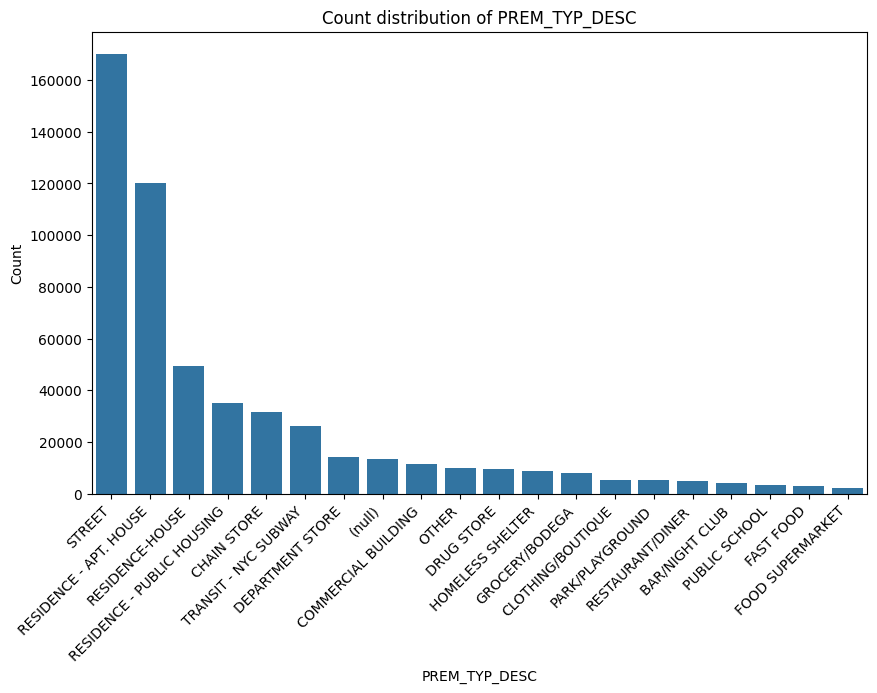

Showing count distribution for column: PREM_TYP_DESC


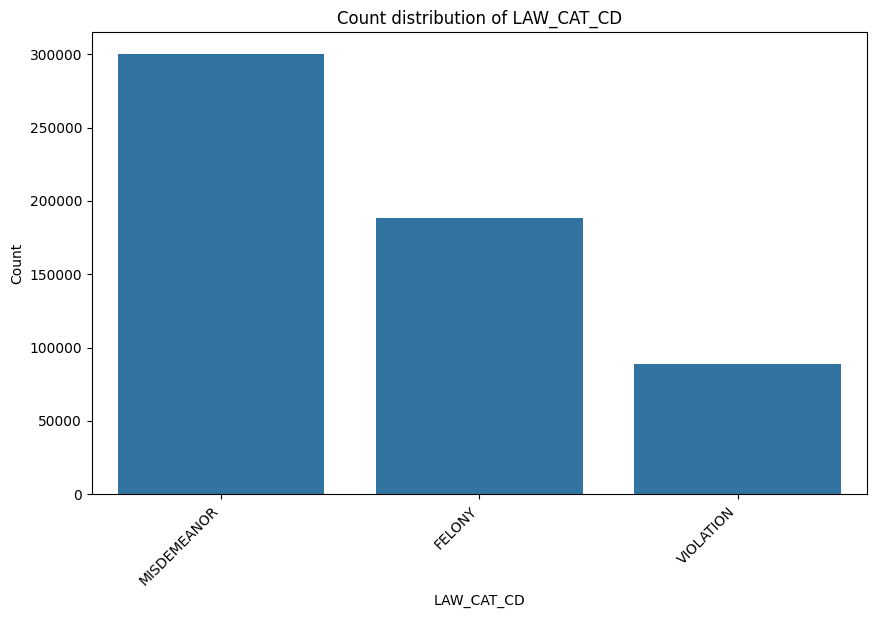

Showing count distribution for column: LAW_CAT_CD


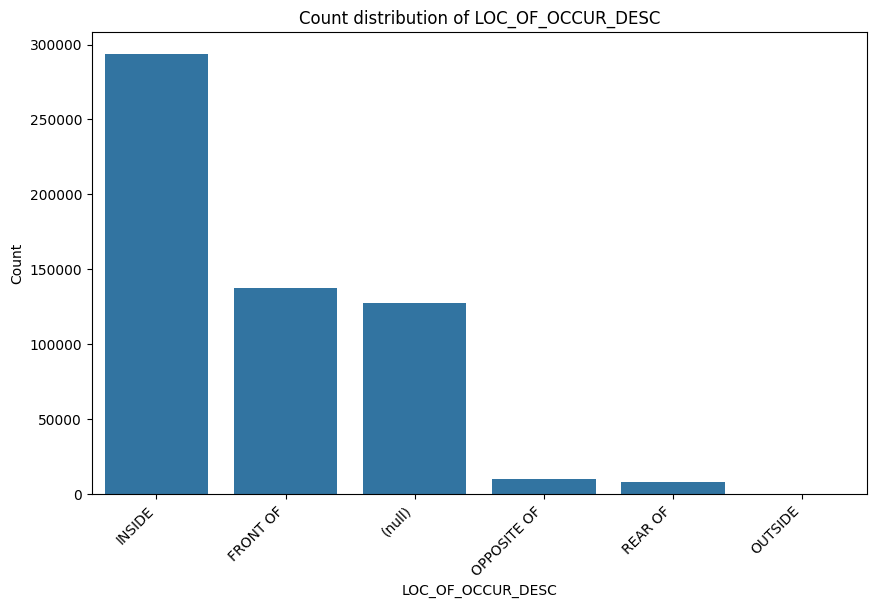

Showing count distribution for column: LOC_OF_OCCUR_DESC


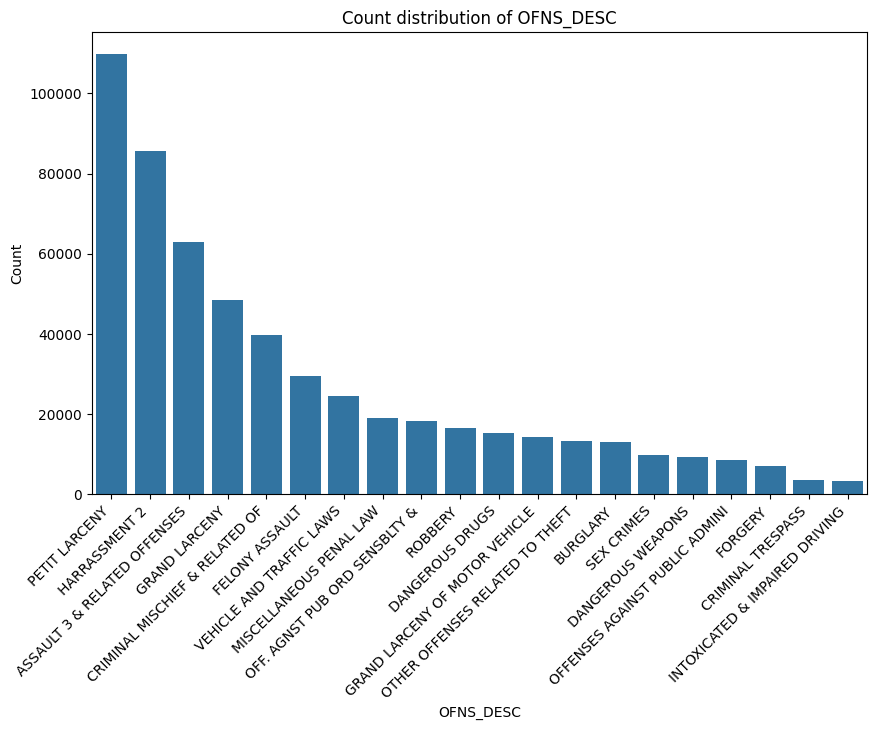

Showing count distribution for column: OFNS_DESC


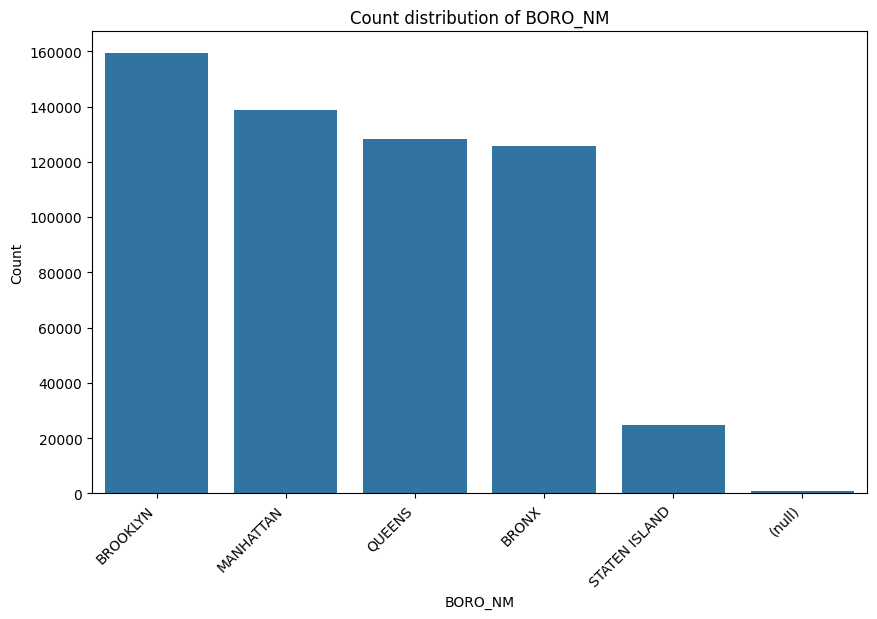

Showing count distribution for column: BORO_NM


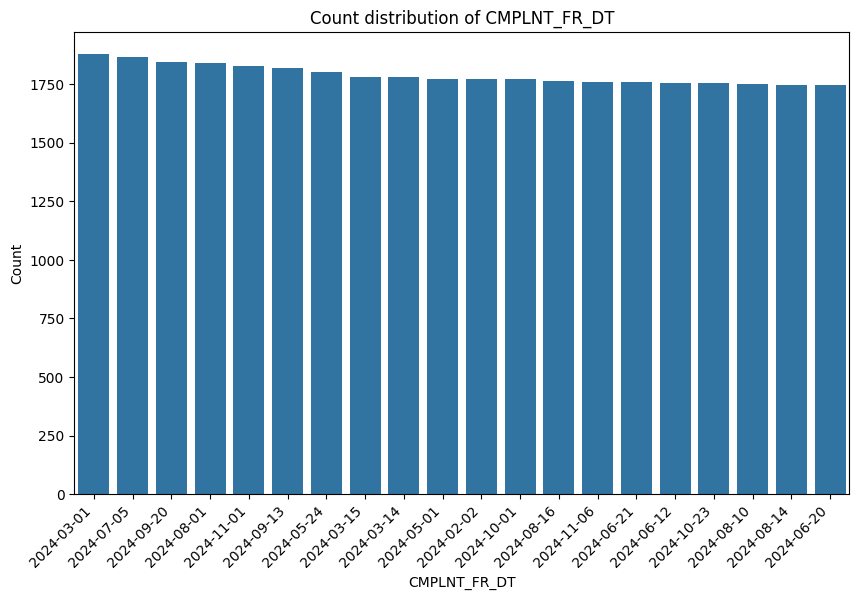

Showing count distribution for column: CMPLNT_FR_DT


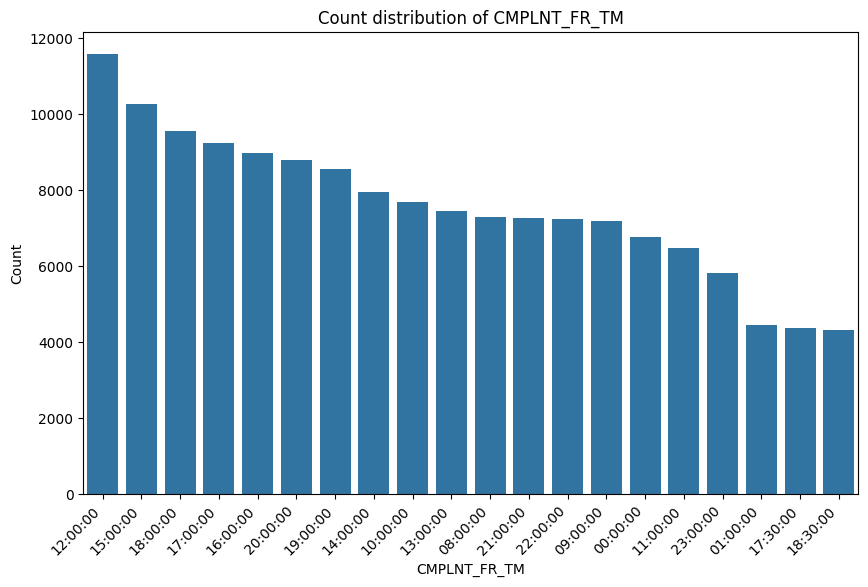

Showing count distribution for column: CMPLNT_FR_TM


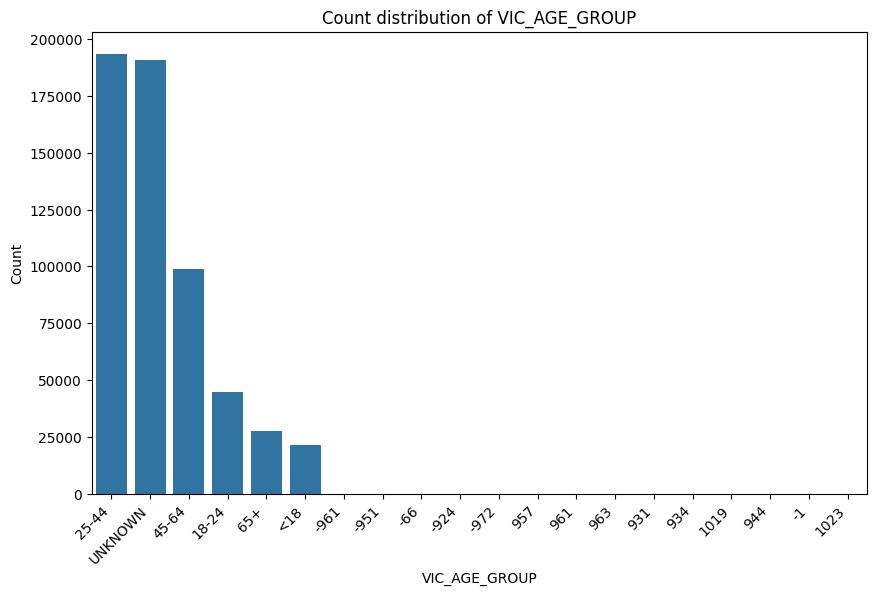

Showing count distribution for column: VIC_AGE_GROUP


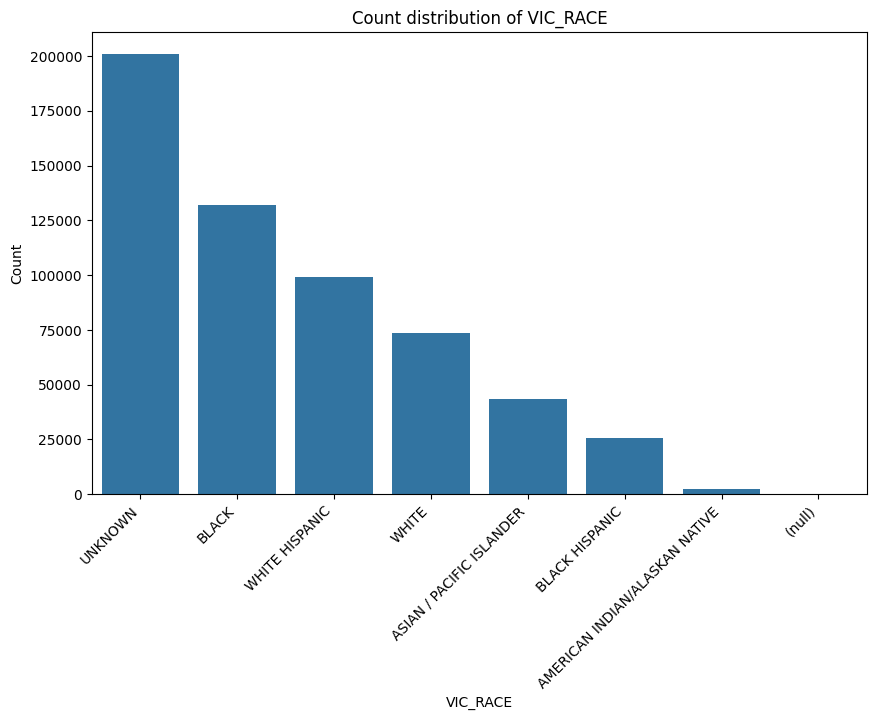

Showing count distribution for column: VIC_RACE


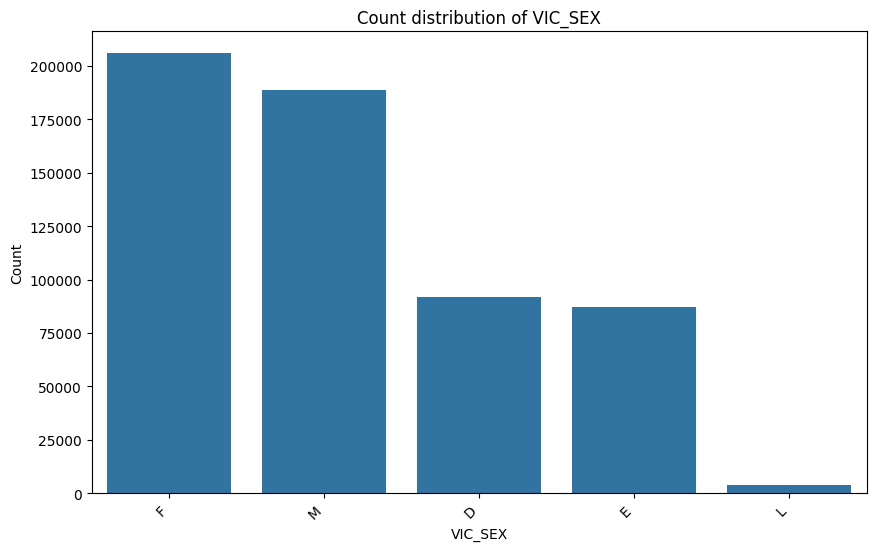

Showing count distribution for column: VIC_SEX


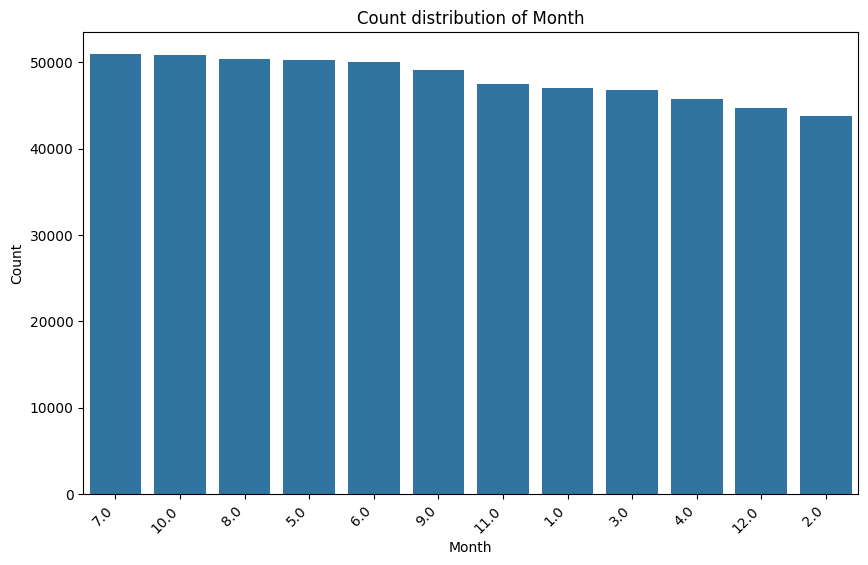

Showing count distribution for column: Month


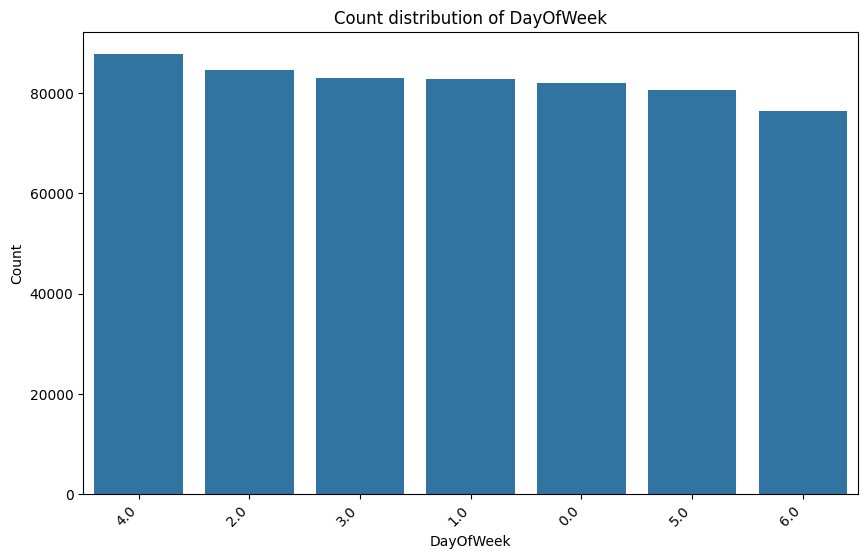

Showing count distribution for column: DayOfWeek


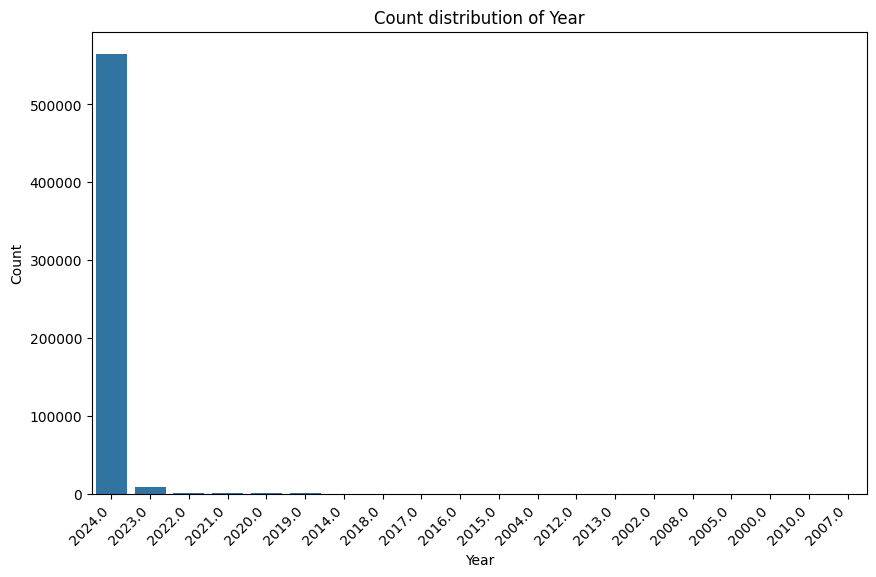

Showing count distribution for column: Year


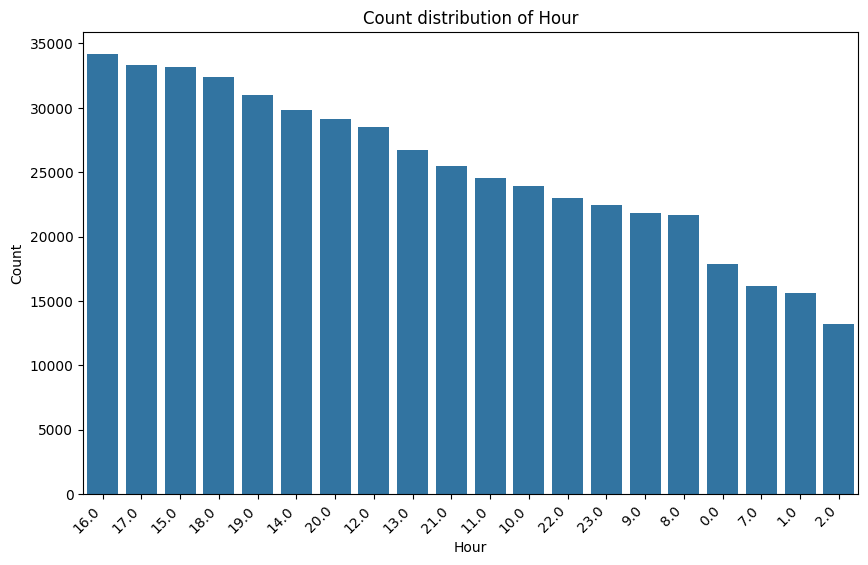

Showing count distribution for column: Hour


In [17]:
columns_of_interest = ['PREM_TYP_DESC', 'LAW_CAT_CD', 'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'Month', 'DayOfWeek', 'Year', 'Hour']

for column in columns_of_interest:
    # Get the count of unique values and filter out low frequency categories if needed
    counts = gdf[column].value_counts()
    
    # Optionally, limit the number of categories shown, e.g., show top 10 most frequent
    top_counts = counts.head(20)  # Adjust this number based on your needs
    
    plt.figure(figsize=(10, 6))
    sns.countplot(x=gdf[column], order=top_counts.index)  # Order by frequency of top counts
    plt.title(f'Count distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    
    # Rotate the x-axis labels if there are many categories
    plt.xticks(rotation=45, ha='right')
    
    # Show the plot
    plt.show()
    
    print(f"Showing count distribution for column: {column}")


In [18]:
gdf_final = gdf[columns_of_interest]
gdf_final.head()

PREM_TYP_DESC LAW_CAT_CD LOC_OF_OCCUR_DESC       OFNS_DESC  \
1         PARK/PLAYGROUND     FELONY            INSIDE            RAPE   
2  RESIDENCE - APT. HOUSE     FELONY            INSIDE           ARSON   
4                  STREET     FELONY            (null)            RAPE   
5               FAST FOOD     FELONY            INSIDE  FELONY ASSAULT   
6         RESIDENCE-HOUSE     FELONY            INSIDE           ARSON   

     BORO_NM CMPLNT_FR_DT CMPLNT_FR_TM VIC_AGE_GROUP VIC_RACE VIC_SEX  Month  \
1      BRONX   2021-02-01     16:00:00           <18    BLACK       F    2.0   
2  MANHATTAN   2024-08-24     00:38:00         25-44  UNKNOWN       F    8.0   
4   BROOKLYN   2024-08-30     14:55:00         18-24    BLACK       F    8.0   
5      BRONX   2024-06-09     12:37:00           65+    BLACK       M    6.0   
6      BRONX   2024-12-26     07:56:00         25-44    BLACK       M   12.0   

   DayOfWeek    Year  Hour  
1        0.0  2021.0   NaN  
2        5.0  2024.0   NaN  
4        4.0  2024.0  15.0  
5        6.0  2024.0   NaN  
6        3.0  2024.0   NaN

In [ ]:
ny_roads_1 = gpd.read_file('/Users/naliniramanathan/projects/se_1/team2-wed-spring25/input_data/tl_2024_36005_roads/tl_2024_36005_roads.shp')

ny_roads_2 = gpd.read_file('/Users/naliniramanathan/projects/se_1/team2-wed-spring25/input_data/tl_2024_36047_roads/tl_2024_36047_roads.shp')

ny_roads_3 = gpd.read_file('/Users/naliniramanathan/projects/se_1/team2-wed-spring25/input_data/tl_2024_36061_roads/tl_2024_36061_roads.shp')

ny_roads_4 = gpd.read_file('/Users/naliniramanathan/projects/se_1/team2-wed-spring25/input_data/tl_2024_36081_roads/tl_2024_36081_roads.shp')

ny_roads_5 = gpd.read_file('/Users/naliniramanathan/projects/se_1/team2-wed-spring25/input_data/tl_2024_36085_roads/tl_2024_36085_roads.shp')

In [20]:
ny_roads_final = gpd.GeoDataFrame(pd.concat([ny_roads_1, ny_roads_2, ny_roads_3, ny_roads_4, ny_roads_5], ignore_index=True))

In [21]:
ny_roads_final.head()

LINEARID          FULLNAME RTTYP  MTFCC  \
0  1104691956808    Bryant Ave Ovp     M  S1710   
1   110391525903  Putnam Ave W Exd     M  S1400   
2   110391524230    E 177th St Exd     M  S1400   
3   110391524663      Depot Pl Exd     M  S1400   
4   110391523687        Rae St Exd     M  S1400   

                                            geometry  
0  LINESTRING (-73.88891 40.82181, -73.88858 40.8...  
1  LINESTRING (-73.90028 40.88302, -73.90014 40.8...  
2  LINESTRING (-73.80205 40.81721, -73.80117 40.8...  
3  LINESTRING (-73.92951 40.84182, -73.92921 40.8...  
4  LINESTRING (-73.91237 40.81751, -73.91234 40.8...

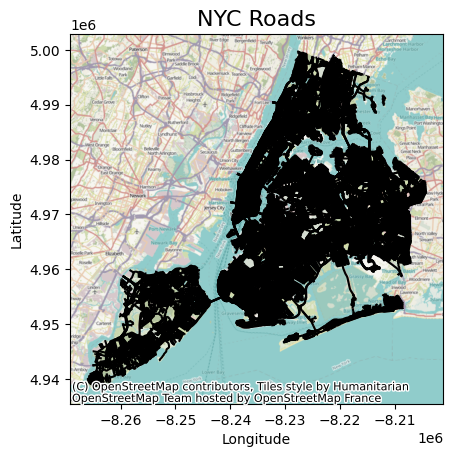

In [22]:
ny_roads_final = ny_roads_final.to_crs(epsg=3857)

ax = ny_roads_final.plot(edgecolor='black')

ctx.add_basemap(ax)

# Add a title and labels
plt.title("NYC Roads", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# min_longitude = -74.03  # Example: New York's longitude
# max_longitude = -73.90
# min_latitude = 40.70    # Example: New York's latitude
# max_latitude = 40.80

# Set the zoom level by adjusting xlim and ylim
# ax.set_xlim(min_longitude, max_longitude)
# ax.set_ylim(min_latitude, max_latitude)

# Show the plot
plt.show()

In [23]:
roads_gdf.columns

NameError: name 'roads_gdf' is not defined

In [ ]:
roads_gdf = ny_roads_final.to_crs("EPSG:2263")  # EPSG:2263 is a state plane CRS in feet
points_gdf = gdf_map.to_crs("EPSG:2263")  # Reproject points as well

# Step 3: Buffer the roads by 20 feet
buffer_radius = 20  # Buffer size in feet
roads_gdf['geometry'] = roads_gdf.buffer(buffer_radius)

joined_gdf = gpd.sjoin(points_gdf, roads_gdf, how='inner', predicate='intersects')

In [ ]:
# Group by 'OFNS_DESC' and 'LINEARID', then count occurrences of 'CMPLNT_NUM'
summary_table = joined_gdf.groupby(['LINEARID'])['CMPLNT_NUM'].count().reset_index()

# Optional: Rename the count column for clarity
summary_table = summary_table.rename(columns={'CMPLNT_NUM': 'CMPLNT_COUNT'})

In [ ]:
# join summary table with the original data
summary_table_new = summary_table.merge(ny_roads_final[['LINEARID', 'geometry']], on='LINEARID', how='inner')
len(summary_table)

11992

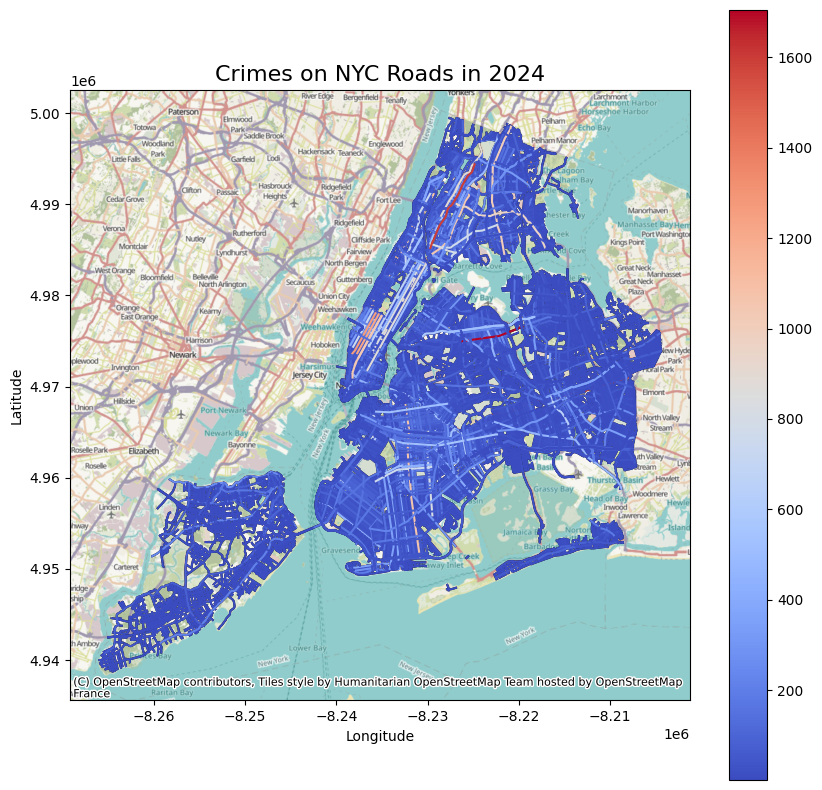

In [ ]:
# Map the summary table

summary_table_new = gpd.GeoDataFrame(summary_table_new, geometry='geometry')
crime_counts_per_road = joined_gdf.groupby('LINEARID')['CMPLNT_NUM'].count().reset_index()
summary_table_new = summary_table_new.to_crs(epsg=3857)

# Plot the geometries (points) on the map
ax = summary_table_new.plot(edgecolor='black', figsize=(10, 10))   

summary_table_new.plot(column='CMPLNT_COUNT', ax=ax, legend=True, cmap='coolwarm', markersize=10)
ctx.add_basemap(ax)
plt.title("Crimes on NYC Roads in 2024", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

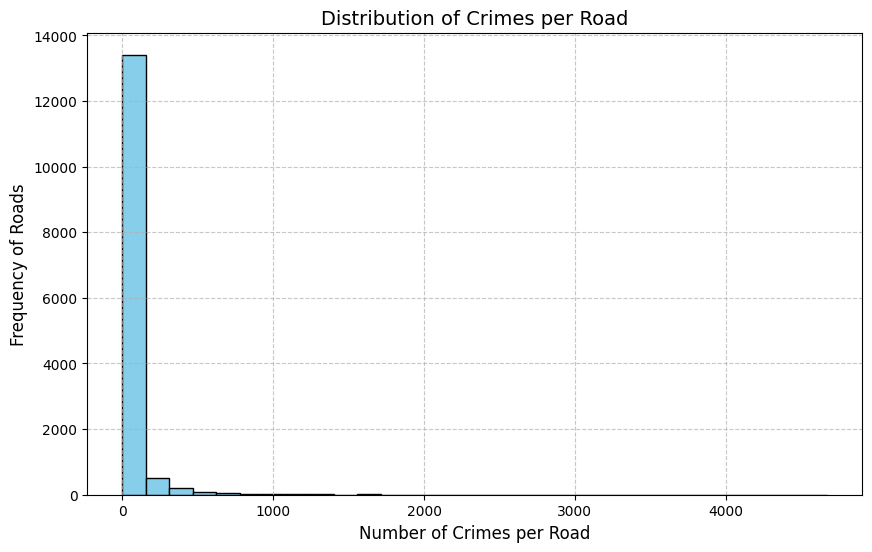

In [ ]:
# Step 1: Group by 'LINEARID' and count crimes (CMPLNT_NUM)
crime_counts_per_road = joined_gdf.groupby('LINEARID')['CMPLNT_NUM'].count().reset_index()

# Step 2: Create a histogram to visualize the distribution
plt.figure(figsize=(10, 6))
plt.hist(crime_counts_per_road['CMPLNT_NUM'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Crimes per Road', fontsize=14)
plt.xlabel('Number of Crimes per Road', fontsize=12)
plt.ylabel('Frequency of Roads', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# Block Level Analysis

In [ ]:
nyc_blocks = gpd.read_file('/Users/naliniramanathan/projects/se_1/team2-wed-spring25/output_data/nyc_blocks.shp')
# Add a road segment identifier 

nyc_blocks['road_seg_id'] = ['ID_{:03d}'.format(i) for i in range(1, len(nyc_blocks) + 1)]

roads_gdf = nyc_blocks.set_crs("3857").to_crs("EPSG:2263")  # EPSG:2263 is a state plane CRS in feet
points_gdf = gdf_map.to_crs("EPSG:2263")  # Reproject points as well

# Step 3: Buffer the roads by 20 feet
buffer_radius = 20  # Buffer size in feet
roads_gdf['geometry'] = roads_gdf.buffer(buffer_radius)

joined_gdf = gpd.sjoin(points_gdf, roads_gdf, how='inner', predicate='intersects')

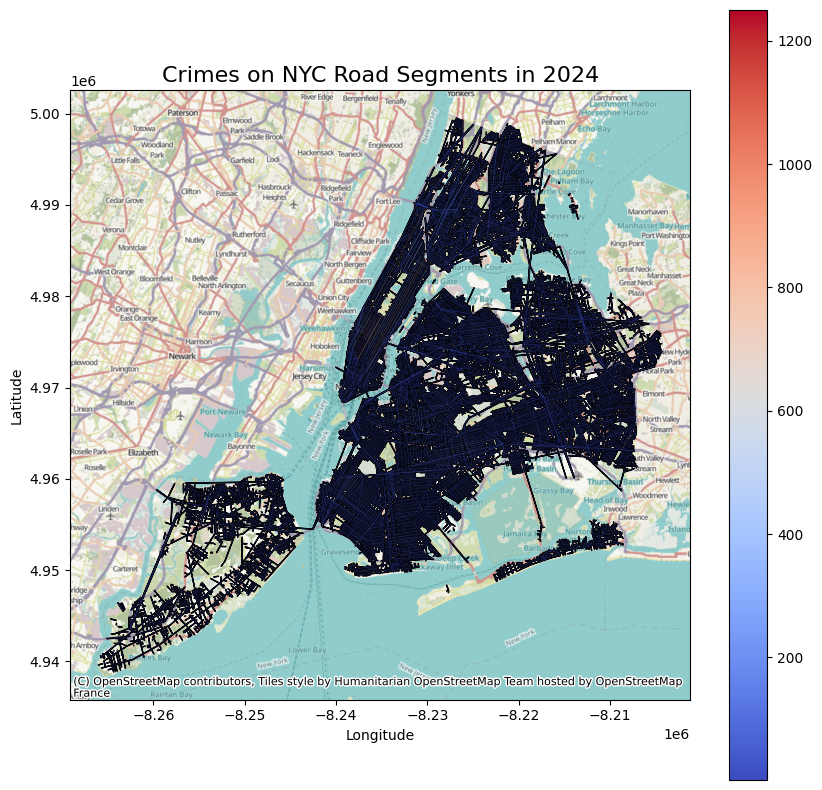

In [ ]:
# Map the summary table
summary_table = joined_gdf.groupby(['road_seg_id'])['CMPLNT_NUM'].count().reset_index()

# Optional: Rename the count column for clarity
summary_table = summary_table.rename(columns={'CMPLNT_NUM': 'CMPLNT_COUNT'})

summary_table_new = summary_table.merge(roads_gdf[['road_seg_id', 'geometry']], on='road_seg_id', how='inner')

summary_table_new = gpd.GeoDataFrame(summary_table_new, geometry='geometry')
summary_table_new = summary_table_new.to_crs(epsg=3857)

# Plot the geometries (points) on the map
ax = summary_table_new.plot(edgecolor='black', figsize=(10, 10))   

summary_table_new.plot(column='CMPLNT_COUNT', ax=ax, legend=True, cmap='coolwarm', markersize=10)
ctx.add_basemap(ax)
plt.title("Crimes on NYC Road Segments in 2024", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

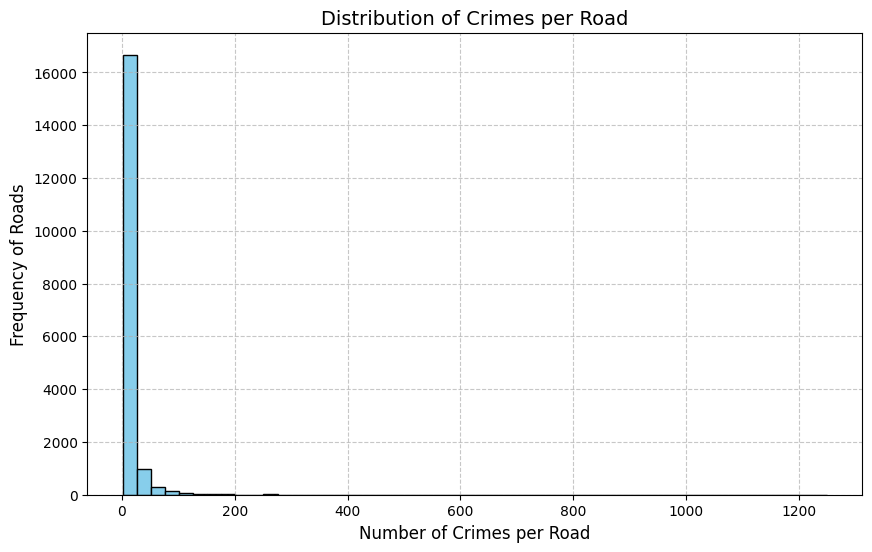

In [ ]:
# Step 1: Group by 'LINEARID' and count crimes (CMPLNT_NUM)
crime_counts_per_road = joined_gdf.groupby('road_seg_id')['CMPLNT_NUM'].count().reset_index()

# Step 2: Create a histogram to visualize the distiibution
plt.figure(figsize=(10, 6))
plt.hist(crime_counts_per_road['CMPLNT_NUM'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Crimes per Road', fontsize=14)
plt.xlabel('Number of Crimes per Road', fontsize=12)
plt.ylabel('Frequency of Roads', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


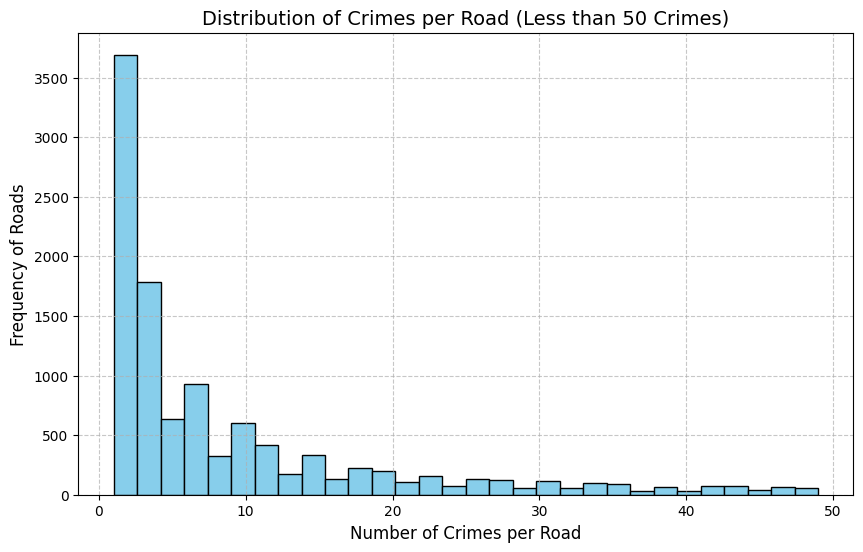

In [ ]:
# Now let's look at a narrower bucket
# Step 2: Filter for roads with less than 500 crimes
crime_lim = 50
filtered_crime_counts = crime_counts_per_road[crime_counts_per_road['CMPLNT_NUM'] < crime_lim]

# Step 3: Create a histogram for the filtered data
plt.figure(figsize=(10, 6))

# Use a higher number of bins for finer distribution
plt.hist(filtered_crime_counts['CMPLNT_NUM'], bins=30, color='skyblue', edgecolor='black')

# Title and labels
plt.title(f'Distribution of Crimes per Road (Less than {crime_lim} Crimes)', fontsize=14)
plt.xlabel('Number of Crimes per Road', fontsize=12)
plt.ylabel('Frequency of Roads', fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display the histogram


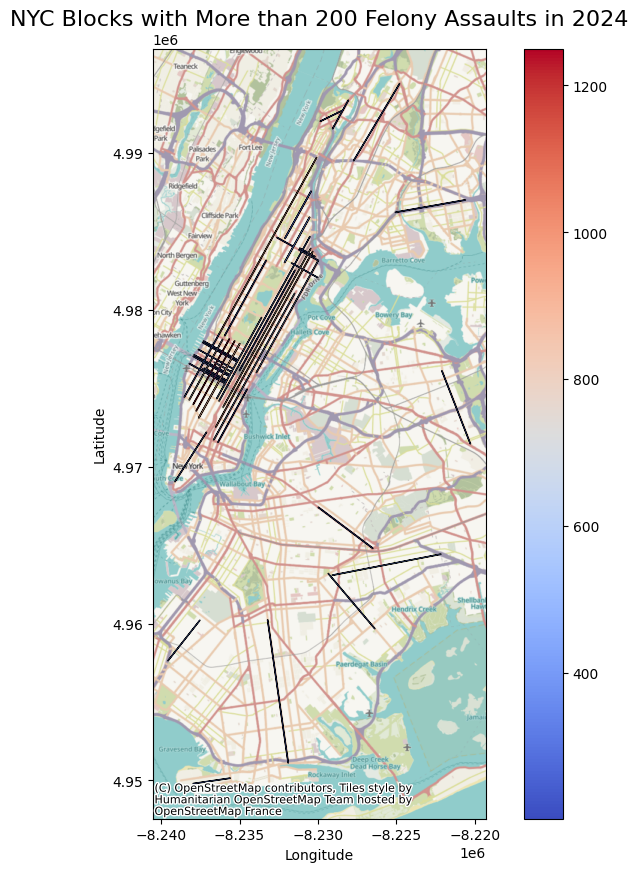

In [ ]:
# Map the summary table
crime_lim_2 = 200
summary_table = joined_gdf.groupby(['road_seg_id'])['CMPLNT_NUM'].count().reset_index()

# Optional: Rename the count column for clarity
summary_table = summary_table.rename(columns={'CMPLNT_NUM': 'CMPLNT_COUNT'})

summary_table_new = summary_table.merge(roads_gdf[['road_seg_id', 'geometry']], on='road_seg_id', how='inner')

summary_table_new = gpd.GeoDataFrame(summary_table_new, geometry='geometry')
summary_table_new = summary_table_new.to_crs(epsg=3857)
summary_table_new = summary_table_new[summary_table_new['CMPLNT_COUNT']>crime_lim_2]

# Plot the geometries (points) on the map
ax = summary_table_new.plot(edgecolor='black', figsize=(10, 10))   

summary_table_new.plot(column='CMPLNT_COUNT', ax=ax, legend=True, cmap='coolwarm', markersize=10)
ctx.add_basemap(ax)
plt.title(f"NYC Blocks with More than {crime_lim_2} Felony Assaults in 2024", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Generating the Population-Level CBs

In [ ]:
# Load the Excel file into a pandas DataFrame
census_data = pd.read_excel('/Users/naliniramanathan/projects/se_1/team2-wed-spring25/input_data/nyc-decennialcensusdata_2010_2020_census-blocks.xlsx')

# Display the first few rows of the DataFrame
census_data.head()

KeyboardInterrupt: 

In [ ]:
# Load the shapefile into a GeoPandas dataframe
blocks_gdf = gpd.read_file('/Users/naliniramanathan/projects/se_1/team2-wed-spring25/input_data/tl_2024_36_tabblock20.shp')

In [ ]:
# Ensure the geometry column is in the correct CRS (WGS84)
blocks_gdf = blocks_gdf.to_crs(epsg=3857)

# Plot the geometries (blocks) on the map
ax = blocks_gdf.plot(edgecolor='black', figsize=(10, 10))

# Add a basemap for context
ctx.add_basemap(ax)

# Add a title and labels
plt.title("NYC Census Blocks", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()

In [ ]:
pd.set_option('display.max_columns', None)
print(census_data.columns)

Index(['Year', 'GeogType', 'FIPSCode', 'BoroCode', 'GeogName', 'GeoID',
       'Unnamed: 6', 'Unnamed: 7', 'Pop1', 'Pop1P',
       ...
       'ROcHH2', 'ROcHH2P', 'ROcHH3', 'ROcHH3P', 'ROcHH4', 'ROcHH4P',
       'ROcHH5pl', 'ROcHH5plP', 'LandAcres', 'LandAcresP'],
      dtype='object', length=232)


In [ ]:
census_data['Year'].unique()

array([2020])